In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()

In [2]:
def bench(n=2**20, q=2**20, source='std'):
    !make -s {source}
    if _exit_code != 0:
        raise Exception("Compilation failed")
    res = !./{source} {n} {q}
    #res = !g++ -O3 -march=native -D N={n} -D Q={q} {source} -o run && ./run
    duration = float(res[0].split()[0])
    check = int(res[1])
    print(f'{source:>18} {n:<7} {q:<7} {check:10} {duration}')
    return duration

ns = list(int(1.17**k) for k in range(30, 60))

In [3]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            #plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', base=2)
    plt.xlabel('Array size')

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc='best')

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()


#plt.plot(ns, inc_res, color='darkred')
#plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'inc.svg', 4.7)

In [4]:
# bench(source='textbook', n=2**24)
# bench(source='branchless', n=2**24)
# bench(source='branchless-prefetch', n=2**24)
# bench(source='branchless-drop-in', n=2**24)

In [5]:
# bench(source='branchless-drop-in', n=2**12)

In [6]:
# [bench(source=source, n=2**12) for source in ['textbook', 'branchless', 'branchless-drop-in']]

In [7]:
# x = [bench(source='eytzinger', n=n, q=2**22) for n in ns]

In [8]:
# y = [bench(source='eytzinger-last', n=n, q=2**22) for n in ns]

In [9]:
# z = [bench(source='eytzinger-fill', n=n, q=2**22) for n in ns]

In [10]:
# mini_std = [bench(source='std', n=n, q=2**22) for n in ns]
# mini_branchless = [bench(source='branchless', n=n, q=2**22) for n in ns]

In [11]:
# plt.plot(ns, mini_std, color='darkred', label='std::lower_bound')
# plt.plot(ns, mini_branchless, color='darkblue', label='branchless')
# plt.plot(ns, x, color='darkgreen', label='eytzinger')

# plot('Binary search', 'Latency (ns)', path='bumps.svg', legend=True)

In [12]:
# plt.plot(ns, x, color='darkred', label='GCC')
# plt.plot(ns, z, color='darkblue', label='GCC (padded array)')
# plt.plot(ns, y, color='darkgreen', label='Clang (removed branch)')

# plot('Binary search', 'Latency (ns)', path='branchless-eytzinger.svg', legend=True)

In [13]:
# bench(source='btree', n=2**23, q=2**22)
# bench(source='btree-hugepages', n=2**23, q=2**22)

In [14]:
#bench(n=2**10, q=2**22, source='std')
#bench(n=2**10, q=2**22, source='textbook')
# bench(n=2**10, q=2**22, source='branchless')
# bench(n=2**10, q=2**22, source='btree-hugepages')
# bench(n=2**10, q=2**22, source='btree-unrolled')

In [15]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            #plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', base=2)
    plt.xlabel('Array size')

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc='best')

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()


#plt.plot(ns, inc_res, color='darkred')
#plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'inc.svg', 4.7)

In [16]:
tasks = [
    # source, name, color
    ('std', 'std::lower_bound', 'darkred'),
    ('branchless', 'branchless', 'darkblue'),
    ('eytzinger', 'eytzinger', 'darkgreen'),
    ('eytzinger-prefetch', 'eytzinger (with prefetching)', 'orange'),
    ('eytzinger-fill','eytzinger (fixed number of iterations)', 'purple')
    # ('btree', 'B-tree (with SIMD)', 'purple'),
    # ('btree-hugepages', 'B-tree (with SIMD and huge pages)', 'cyan'),
]

#ns = [2**14, 2**15]
ns = list(int(1.17**k) for k in range(30, 105))

results = [
    [bench(n=n, q=2**22, source=source) for n in ns]
    for source, _, _ in tasks
]

               std 111     4194304 1067433874 23.15
               std 129     4194304 2084202863 25.46
               std 152     4194304 1650086489 25.54
               std 177     4194304 1093987052 26.19
               std 208     4194304  849577987 29.81
               std 243     4194304 1842022031 31.05
               std 284     4194304   24170984 30.87
               std 333     4194304 1064724685 32.14
               std 389     4194304 1049421536 33.02
               std 456     4194304 1677787291 34.88
               std 533     4194304 1381557454 40.18
               std 624     4194304  485950239 38.05
               std 730     4194304 1743435292 39.95
               std 855     4194304 1980389118 40.28
               std 1000    4194304  929098415 42.11
               std 1170    4194304 1814983758 41.28
               std 1369    4194304  683804919 42.56
               std 1602    4194304  231941320 44.58
               std 1874    4194304  926717548 45.62
            

In [17]:
import pickle

with open('results.pkl', 'wb') as file:
    pickle.dump(results, file)

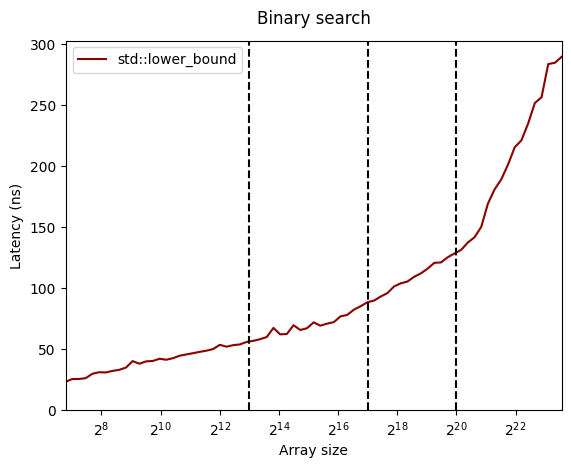

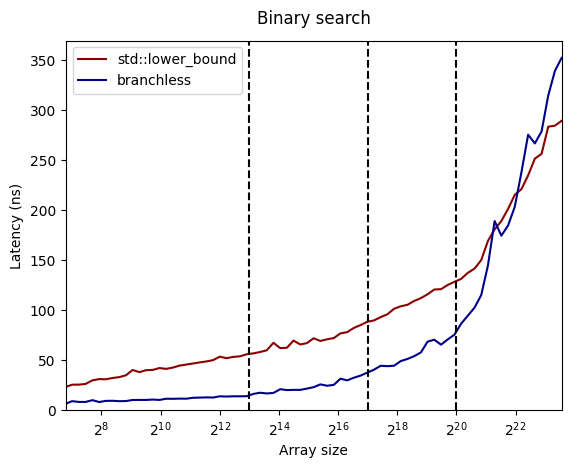

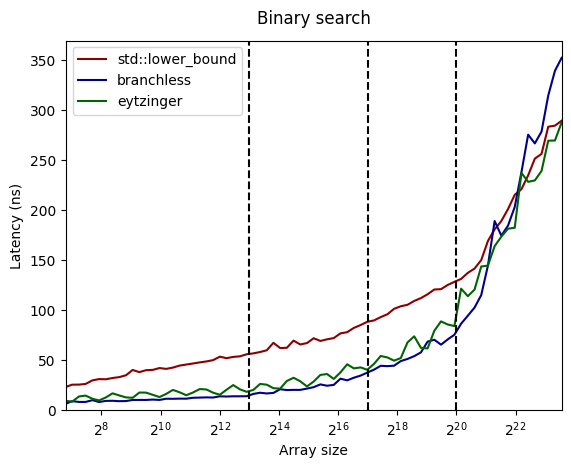

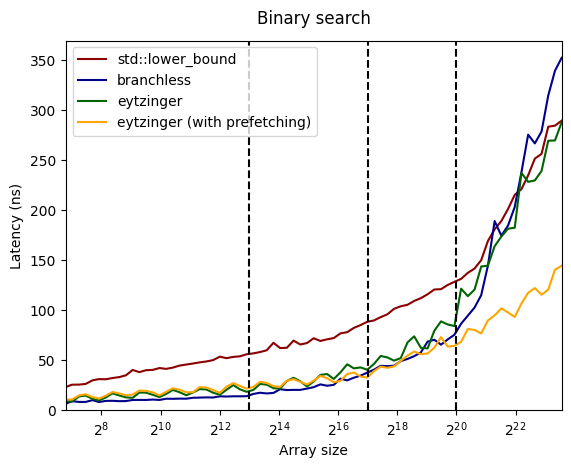

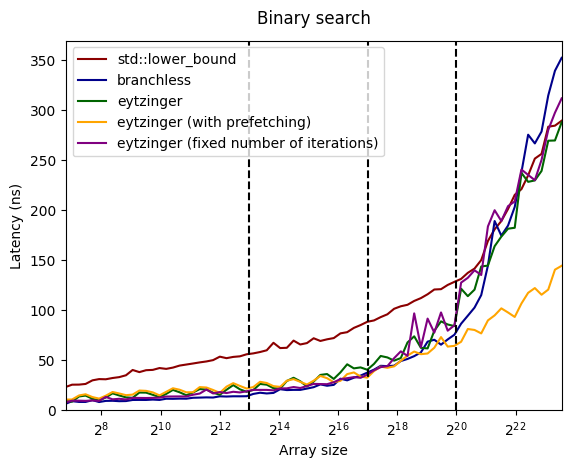

In [18]:
for i, current in enumerate(tasks):
    for (source, name, color), latencies in list(zip(tasks, results))[:i + 1]:
        plt.plot(ns, latencies, color=color, label=name)
    
    plot('Binary search', 'Latency (ns)', current[0] + '.svg', 1, legend=True)

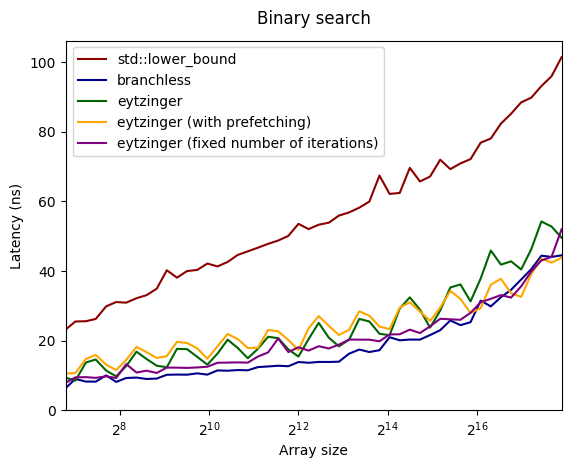

In [19]:
lim = 50
for (source, name, color), latencies in list(zip(tasks, results)):
    plt.plot(ns[:lim], latencies[:lim], color=color, label=name)

plot('Binary search', 'Latency (ns)', 'mini.svg', legend=True)